# Comparing plasticity rules

## For every model, meta-learn on 8-dimensional ReLU dataset, then transfer rules, then train / test on the exact same dataset.

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

## First, test original RNN as a sanity check.

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
scheme = UpdateScheme(cross_entropy_loss=True,
                      mse_loss=False,
                      update_misclassified_only=False,
                      update_all_edges=True)

# Feed-forward brain config.
n_up = 8  # Input layer size for meta-learning.
n_down = 8  # Input layer size for desired task training.
m = 2  # Output layer size.
l = 2  # Number of hidden layers.
w = 20  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 10  # Number of nodes firing per layer.

# Training config.
num_runs = 10
num_rule_epochs = 20
num_epochs_upstream = 1
num_epochs_downstream = 2

In [3]:
# Instantiate brain factories.
brain_rnn_up_fact = lambda: LocalNet(n_up, m, 100, p, 50, 3, options=opts_up, update_scheme=scheme)
brain_rnn_down_fact = lambda: LocalNet(n_down, m, 100, p, 50, 3, options=opts_down, update_scheme=scheme)

In [4]:
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_up_down(
    brain_rnn_up_fact, brain_rnn_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

..\DataGenerator.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out2 = F.softmax(torch.matmul(out1, w1))
  0%|                               | 0/20 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====
Run 1 / 10...
Count of 0: 4499  Count of 1: 1501
Meta-learning...


100%|██████████████████████| 20/20 [00:36<00:00,  1.80s/it]
..\LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()
  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4447
Last train accuracy: 0.7607
Last test accuracy: 0.7596
Count of 0: 5821  Count of 1: 179
Training...
INITIAL train accuracy: 0.1913
INITIAL test accuracy: 0.2007
Epoch 1 / 2 ...


  7%|█▏                | 104/1500 [00:00<00:02, 505.43it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.3453
Last train accuracy: 0.9733
Last test accuracy: 0.9691
Run 2 / 10...
Count of 0: 2226  Count of 1: 3774
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.5076
Last train accuracy: 0.7973
Last test accuracy: 0.7853
Count of 0: 1842  Count of 1: 4158
Training...
INITIAL train accuracy: 0.7580
INITIAL test accuracy: 0.7709
Epoch 1 / 2 ...


  7%|█▏                | 103/1500 [00:00<00:02, 506.90it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.6153
Last train accuracy: 0.6780
Last test accuracy: 0.6980
Run 3 / 10...
Count of 0: 2361  Count of 1: 3639
Meta-learning...


  3%|▋                  | 52/1500 [00:00<00:02, 519.51it/s]

Last loss: 0.4478
Last train accuracy: 0.8560
Last test accuracy: 0.8591
Count of 0: 1286  Count of 1: 4714
Training...
INITIAL train accuracy: 0.5460
INITIAL test accuracy: 0.5824
Epoch 1 / 2 ...


  3%|▌                  | 49/1500 [00:00<00:02, 484.72it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5253
Last train accuracy: 0.7960
Last test accuracy: 0.7822
Run 4 / 10...
Count of 0: 5276  Count of 1: 724
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.3854
Last train accuracy: 0.8847
Last test accuracy: 0.8776
Count of 0: 4328  Count of 1: 1672
Training...
INITIAL train accuracy: 0.7167
INITIAL test accuracy: 0.7229
Epoch 1 / 2 ...


  3%|▋                  | 52/1500 [00:00<00:02, 519.52it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5998
Last train accuracy: 0.7167
Last test accuracy: 0.7229
Run 5 / 10...
Count of 0: 2732  Count of 1: 3268
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4663
Last train accuracy: 0.8553
Last test accuracy: 0.8611
Count of 0: 4267  Count of 1: 1733
Training...
INITIAL train accuracy: 0.5173
INITIAL test accuracy: 0.5093
Epoch 1 / 2 ...


  7%|█▎                | 109/1500 [00:00<00:02, 537.48it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5853
Last train accuracy: 0.7173
Last test accuracy: 0.7091
Run 6 / 10...
Count of 0: 1165  Count of 1: 4835
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4564
Last train accuracy: 0.8753
Last test accuracy: 0.8693
Count of 0: 130  Count of 1: 5870
Training...
INITIAL train accuracy: 0.9787
INITIAL test accuracy: 0.9771
Epoch 1 / 2 ...


  7%|█▏                | 100/1500 [00:00<00:02, 499.91it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.3353
Last train accuracy: 0.9800
Last test accuracy: 0.9778
Run 7 / 10...
Count of 0: 2791  Count of 1: 3209
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4404
Last train accuracy: 0.8940
Last test accuracy: 0.8940
Count of 0: 4073  Count of 1: 1927
Training...
INITIAL train accuracy: 0.6047
INITIAL test accuracy: 0.6384
Epoch 1 / 2 ...


  4%|▋                  | 53/1500 [00:00<00:02, 520.05it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.6233
Last train accuracy: 0.6867
Last test accuracy: 0.6762
Run 8 / 10...
Count of 0: 3130  Count of 1: 2870
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4338
Last train accuracy: 0.8733
Last test accuracy: 0.8760
Count of 0: 5569  Count of 1: 431
Training...
INITIAL train accuracy: 0.5300
INITIAL test accuracy: 0.5391
Epoch 1 / 2 ...


  7%|█▏                | 101/1500 [00:00<00:02, 488.48it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.3773
Last train accuracy: 0.9260
Last test accuracy: 0.9247
Run 9 / 10...
Count of 0: 2564  Count of 1: 3436
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4399
Last train accuracy: 0.8533
Last test accuracy: 0.8596
Count of 0: 3289  Count of 1: 2711
Training...
INITIAL train accuracy: 0.5160
INITIAL test accuracy: 0.5171
Epoch 1 / 2 ...


  4%|▋                  | 53/1500 [00:00<00:02, 529.52it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7853
Last train accuracy: 0.5253
Last test accuracy: 0.5558
Run 10 / 10...
Count of 0: 2339  Count of 1: 3661
Meta-learning...


  0%|                             | 0/1500 [00:00<?, ?it/s]

Last loss: 0.4904
Last train accuracy: 0.8080
Last test accuracy: 0.7991
Count of 0: 1244  Count of 1: 4756
Training...
INITIAL train accuracy: 0.5873
INITIAL test accuracy: 0.5949
Epoch 1 / 2 ...


  7%|█▏                | 100/1500 [00:00<00:02, 495.05it/s]


Epoch 2 / 2 ...


100%|█████████████████| 1500/1500 [00:03<00:00, 472.45it/s]


Last loss: 0.5353
Last train accuracy: 0.7860
Last test accuracy: 0.7949


Saving figure to: figs/default


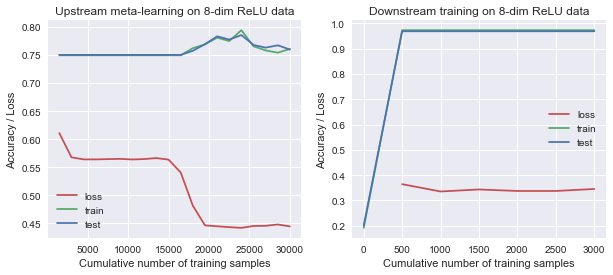

Mean essential stats across all runs:
Last upstream loss: 0.4447
Last upstream train accuracy: 0.7607
Last upstream test accuracy: 0.7596
Last downstream loss: 0.3453
Last downstream train accuracy: 0.9733
Last downstream test accuracy: 0.9691



In [5]:
# Plot FIRST run stats only.
plot_curves(stats_rnn_up[0], stats_rnn_down[0],
            '[RNN] Upstream meta-learning on 8-dim ReLU data',
            '[RNN] Downstream training on 8-dim ReLU data')

Saving figure to: figs/comparing_rnn_curves


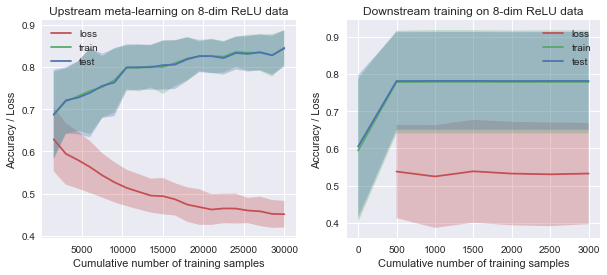

Mean essential stats across all runs:
Last upstream loss: 0.4513
Last upstream train accuracy: 0.8458
Last upstream test accuracy: 0.8441
Last downstream loss: 0.5327
Last downstream train accuracy: 0.7785
Last downstream test accuracy: 0.7811



In [6]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on 8-dim ReLU data',
            '[RNN] Downstream training on 8-dim ReLU data',
            'figs/comparing_rnn_curves')

## Evaluate all table-based feed-forward networks.

In [7]:
# Instantiate brain factories.
brain_prepost_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme)
brain_prepost_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme)
brain_prepostcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme)
brain_prepostcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostCount(),
    output_rule=TableRule_PrePostCount(), options=opts_up, update_scheme=scheme)
brain_prepostpercent_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_up, update_scheme=scheme)
brain_prepostpercent_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PrePostPercent(),
    output_rule=TableRule_PrePostPercent(), options=opts_up, update_scheme=scheme)
brain_postcount_up_fact = lambda: FFLocalNet(
    n_up, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_up, update_scheme=scheme)
brain_postcount_down_fact = lambda: FFLocalNet(
    n_down, m, l, w, p, cap, hl_rules=TableRule_PostCount(),
    output_rule=TableRule_PostCount(), options=opts_up, update_scheme=scheme)

In [8]:
# Evaluate models.
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_up_down(
    brain_prepost_up_fact, brain_prepost_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Incoming Count ====')
stats_prepostcount_up, stats_prepostcount_down = evaluate_up_down(
    brain_prepostcount_up_fact, brain_prepostcount_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Pre and Post and Binned Incoming Fraction ====')
stats_prepostpercent_up, stats_prepostpercent_down = evaluate_up_down(
    brain_prepostpercent_up_fact, brain_prepostpercent_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('==== Interpretation: Post and Incoming Count ====')
stats_postcount_up, stats_postcount_down = evaluate_up_down(
    brain_postcount_up_fact, brain_postcount_down_fact, n_up, n_down, dataset='relu',
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

..\DataGenerator.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out2 = F.softmax(torch.matmul(out1, w1))
  0%|                               | 0/20 [00:00<?, ?it/s]

==== Interpretation: Pre and Post ====
Run 1 / 10...
Count of 0: 3469  Count of 1: 2531
Meta-learning...


  6%|█▏                 | 94/1500 [00:00<00:01, 939.15it/s]

Last loss: 0.4681
Last train accuracy: 0.8227
Last test accuracy: 0.8027
Count of 0: 3264  Count of 1: 2736
Training...
INITIAL train accuracy: 0.5507
INITIAL test accuracy: 0.5418
Epoch 1 / 2 ...


 13%|██▎               | 191/1500 [00:00<00:01, 959.93it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5793
Last train accuracy: 0.7373
Last test accuracy: 0.7542
Run 2 / 10...
Count of 0: 4175  Count of 1: 1825
Meta-learning...


  6%|█▏                 | 94/1500 [00:00<00:01, 939.14it/s]

Last loss: 0.6931
Last train accuracy: 0.6947
Last test accuracy: 0.6962
Count of 0: 774  Count of 1: 5226
Training...
INITIAL train accuracy: 0.1227
INITIAL test accuracy: 0.1311
Epoch 1 / 2 ...


 12%|██▏               | 184/1500 [00:00<00:01, 899.94it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.1227
Last test accuracy: 0.1311
Run 3 / 10...
Count of 0: 3010  Count of 1: 2990
Meta-learning...


  6%|█▏                 | 95/1500 [00:00<00:01, 949.14it/s]

Last loss: 0.4221
Last train accuracy: 0.8953
Last test accuracy: 0.8869
Count of 0: 5764  Count of 1: 236
Training...
INITIAL train accuracy: 0.0393
INITIAL test accuracy: 0.0393
Epoch 1 / 2 ...


  6%|█▏                 | 95/1500 [00:00<00:01, 949.06it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.3553
Last train accuracy: 0.9600
Last test accuracy: 0.9600
Run 4 / 10...
Count of 0: 3122  Count of 1: 2878
Meta-learning...


  6%|█▏                 | 93/1500 [00:00<00:01, 929.16it/s]

Last loss: 0.6931
Last train accuracy: 0.5247
Last test accuracy: 0.5189
Count of 0: 2371  Count of 1: 3629
Training...
INITIAL train accuracy: 0.4360
INITIAL test accuracy: 0.4304
Epoch 1 / 2 ...


  6%|█▏                 | 96/1500 [00:00<00:01, 959.13it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.4040
Last test accuracy: 0.3922
Run 5 / 10...
Count of 0: 3607  Count of 1: 2393
Meta-learning...


  6%|█▏                 | 95/1500 [00:00<00:01, 949.26it/s]

Last loss: 0.4085
Last train accuracy: 0.9253
Last test accuracy: 0.9138
Count of 0: 3195  Count of 1: 2805
Training...
INITIAL train accuracy: 0.5247
INITIAL test accuracy: 0.5351
Epoch 1 / 2 ...


 11%|██                | 171/1500 [00:00<00:01, 841.87it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.6413
Last train accuracy: 0.6593
Last test accuracy: 0.6593
Run 6 / 10...
Count of 0: 4109  Count of 1: 1891
Meta-learning...


  6%|█▏                 | 89/1500 [00:00<00:01, 889.19it/s]

Last loss: 0.5049
Last train accuracy: 0.6853
Last test accuracy: 0.6847
Count of 0: 2638  Count of 1: 3362
Training...
INITIAL train accuracy: 0.4293
INITIAL test accuracy: 0.4431
Epoch 1 / 2 ...


 12%|██▏               | 183/1500 [00:00<00:01, 923.58it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7253
Last train accuracy: 0.5707
Last test accuracy: 0.5569
Run 7 / 10...
Count of 0: 1224  Count of 1: 4776
Meta-learning...


  6%|█▏                 | 91/1500 [00:00<00:01, 900.17it/s]

Last loss: 0.4410
Last train accuracy: 0.8393
Last test accuracy: 0.8398
Count of 0: 3752  Count of 1: 2248
Training...
INITIAL train accuracy: 0.6287
INITIAL test accuracy: 0.6242
Epoch 1 / 2 ...


 13%|██▎               | 188/1500 [00:00<00:01, 943.05it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7073
Last train accuracy: 0.6287
Last test accuracy: 0.6242
Run 8 / 10...
Count of 0: 1922  Count of 1: 4078
Meta-learning...


  6%|█▏                 | 94/1500 [00:00<00:01, 939.14it/s]

Last loss: 0.5039
Last train accuracy: 0.7080
Last test accuracy: 0.7158
Count of 0: 5609  Count of 1: 391
Training...
INITIAL train accuracy: 0.9367
INITIAL test accuracy: 0.9342
Epoch 1 / 2 ...


 12%|██▏               | 186/1500 [00:00<00:01, 933.54it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.3773
Last train accuracy: 0.9367
Last test accuracy: 0.9342
Run 9 / 10...
Count of 0: 4368  Count of 1: 1632
Meta-learning...


  6%|█                  | 88/1500 [00:00<00:01, 879.20it/s]

Last loss: 0.5024
Last train accuracy: 0.7193
Last test accuracy: 0.7309
Count of 0: 34  Count of 1: 5966
Training...
INITIAL train accuracy: 0.0067
INITIAL test accuracy: 0.0053
Epoch 1 / 2 ...


 13%|██▎               | 190/1500 [00:00<00:01, 956.76it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.3173
Last train accuracy: 0.9933
Last test accuracy: 0.9947
Run 10 / 10...
Count of 0: 4432  Count of 1: 1568
Meta-learning...


  6%|█▏                 | 89/1500 [00:00<00:01, 889.16it/s]

Last loss: 0.6931
Last train accuracy: 0.7540
Last test accuracy: 0.7336
Count of 0: 3033  Count of 1: 2967
Training...
INITIAL train accuracy: 0.5207
INITIAL test accuracy: 0.5004
Epoch 1 / 2 ...


 12%|██▏               | 179/1500 [00:00<00:01, 887.79it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.6931
Last train accuracy: 0.5207
Last test accuracy: 0.5004
==== Interpretation: Pre and Post and Incoming Count ====
Run 1 / 10...
Count of 0: 3815  Count of 1: 2185
Meta-learning...


  5%|█                  | 82/1500 [00:00<00:01, 819.26it/s]

Last loss: 0.4042
Last train accuracy: 0.9207
Last test accuracy: 0.9107
Count of 0: 5642  Count of 1: 358
Training...
INITIAL train accuracy: 0.0700
INITIAL test accuracy: 0.0562
Epoch 1 / 2 ...


 12%|██▏               | 179/1500 [00:00<00:01, 893.77it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.3713
Last train accuracy: 0.9300
Last test accuracy: 0.9438
Run 2 / 10...
Count of 0: 3167  Count of 1: 2833
Meta-learning...


  6%|█                  | 87/1500 [00:00<00:01, 860.60it/s]

Last loss: 0.4537
Last train accuracy: 0.8753
Last test accuracy: 0.8747
Count of 0: 552  Count of 1: 5448
Training...
INITIAL train accuracy: 0.9047
INITIAL test accuracy: 0.9091
Epoch 1 / 2 ...


  6%|█▏                 | 90/1500 [00:00<00:01, 894.66it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.4073
Last train accuracy: 0.9067
Last test accuracy: 0.9102
Run 3 / 10...
Count of 0: 4497  Count of 1: 1503
Meta-learning...


  6%|█▏                 | 89/1500 [00:00<00:01, 880.39it/s]

Last loss: 0.4753
Last train accuracy: 0.7400
Last test accuracy: 0.7527
Count of 0: 1010  Count of 1: 4990
Training...
INITIAL train accuracy: 0.1647
INITIAL test accuracy: 0.1696
Epoch 1 / 2 ...


 12%|██                | 176/1500 [00:00<00:01, 873.09it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.4833
Last train accuracy: 0.8353
Last test accuracy: 0.8304
Run 4 / 10...
Count of 0: 2668  Count of 1: 3332
Meta-learning...


  6%|█▏                 | 89/1500 [00:00<00:01, 880.38it/s]

Last loss: 0.5278
Last train accuracy: 0.7833
Last test accuracy: 0.7629
Count of 0: 3811  Count of 1: 2189
Training...
INITIAL train accuracy: 0.3840
INITIAL test accuracy: 0.3584
Epoch 1 / 2 ...


  6%|█▏                 | 92/1500 [00:00<00:01, 919.17it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5413
Last train accuracy: 0.7927
Last test accuracy: 0.7900
Run 5 / 10...
Count of 0: 4251  Count of 1: 1749
Meta-learning...


  6%|█                  | 87/1500 [00:00<00:01, 869.21it/s]

Last loss: 0.4809
Last train accuracy: 0.7233
Last test accuracy: 0.7036
Count of 0: 2086  Count of 1: 3914
Training...
INITIAL train accuracy: 0.6413
INITIAL test accuracy: 0.6560
Epoch 1 / 2 ...


  6%|█▏                 | 94/1500 [00:00<00:01, 934.43it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.6853
Last train accuracy: 0.6413
Last test accuracy: 0.6560
Run 6 / 10...
Count of 0: 5013  Count of 1: 987
Meta-learning...


  6%|█                  | 85/1500 [00:00<00:01, 849.23it/s]

Last loss: 0.4309
Last train accuracy: 0.8407
Last test accuracy: 0.8338
Count of 0: 1130  Count of 1: 4870
Training...
INITIAL train accuracy: 0.1973
INITIAL test accuracy: 0.1853
Epoch 1 / 2 ...


  6%|█                  | 86/1500 [00:00<00:01, 859.22it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5333
Last train accuracy: 0.8027
Last test accuracy: 0.8147
Run 7 / 10...
Count of 0: 4718  Count of 1: 1282
Meta-learning...


  6%|█                  | 83/1500 [00:00<00:01, 829.12it/s]

Last loss: 0.4470
Last train accuracy: 0.7893
Last test accuracy: 0.7853
Count of 0: 3230  Count of 1: 2770
Training...
INITIAL train accuracy: 0.4787
INITIAL test accuracy: 0.4560
Epoch 1 / 2 ...


 11%|██                | 172/1500 [00:00<00:01, 836.85it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7953
Last train accuracy: 0.5213
Last test accuracy: 0.5440
Run 8 / 10...
Count of 0: 4341  Count of 1: 1659
Meta-learning...


  6%|█                  | 87/1500 [00:00<00:01, 869.21it/s]

Last loss: 0.4971
Last train accuracy: 0.7313
Last test accuracy: 0.7209
Count of 0: 4848  Count of 1: 1152
Training...
INITIAL train accuracy: 0.8147
INITIAL test accuracy: 0.8058
Epoch 1 / 2 ...


  6%|█                  | 86/1500 [00:00<00:01, 859.22it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.4853
Last train accuracy: 0.8147
Last test accuracy: 0.8058
Run 9 / 10...
Count of 0: 4923  Count of 1: 1077
Meta-learning...


  6%|█                  | 87/1500 [00:00<00:01, 869.07it/s]

Last loss: 0.4478
Last train accuracy: 0.8013
Last test accuracy: 0.8269
Count of 0: 4782  Count of 1: 1218
Training...
INITIAL train accuracy: 0.2013
INITIAL test accuracy: 0.2036
Epoch 1 / 2 ...


 12%|██                | 173/1500 [00:00<00:01, 867.62it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.4993
Last train accuracy: 0.7987
Last test accuracy: 0.7964
Run 10 / 10...
Count of 0: 2325  Count of 1: 3675
Meta-learning...


  6%|█                  | 87/1500 [00:00<00:01, 869.21it/s]

Last loss: 0.4283
Last train accuracy: 0.9020
Last test accuracy: 0.8867
Count of 0: 1667  Count of 1: 4333
Training...
INITIAL train accuracy: 0.2707
INITIAL test accuracy: 0.2802
Epoch 1 / 2 ...


  6%|█                  | 87/1500 [00:00<00:01, 869.21it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5333
Last train accuracy: 0.7827
Last test accuracy: 0.7709
==== Interpretation: Pre and Post and Binned Incoming Fraction ====
Run 1 / 10...
Count of 0: 3736  Count of 1: 2264
Meta-learning...


  5%|█                  | 81/1500 [00:00<00:01, 809.20it/s]

Last loss: 0.4333
Last train accuracy: 0.9040
Last test accuracy: 0.9013
Count of 0: 3894  Count of 1: 2106
Training...
INITIAL train accuracy: 0.6513
INITIAL test accuracy: 0.6482
Epoch 1 / 2 ...


 11%|██                | 172/1500 [00:00<00:01, 854.57it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.6153
Last train accuracy: 0.7227
Last test accuracy: 0.7198
Run 2 / 10...
Count of 0: 3563  Count of 1: 2437
Meta-learning...


  6%|█                  | 87/1500 [00:00<00:01, 869.21it/s]

Last loss: 0.4426
Last train accuracy: 0.8293
Last test accuracy: 0.8142
Count of 0: 4437  Count of 1: 1563
Training...
INITIAL train accuracy: 0.2633
INITIAL test accuracy: 0.2596
Epoch 1 / 2 ...


 11%|█▉                | 166/1500 [00:00<00:01, 821.03it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5733
Last train accuracy: 0.7393
Last test accuracy: 0.7427
Run 3 / 10...
Count of 0: 1967  Count of 1: 4033
Meta-learning...


  6%|█                  | 83/1500 [00:00<00:01, 821.03it/s]

Last loss: 0.5152
Last train accuracy: 0.6947
Last test accuracy: 0.6922
Count of 0: 3023  Count of 1: 2977
Training...
INITIAL train accuracy: 0.5167
INITIAL test accuracy: 0.4996
Epoch 1 / 2 ...


 11%|█▉                | 166/1500 [00:00<00:01, 829.24it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.8133
Last train accuracy: 0.5167
Last test accuracy: 0.4996
Run 4 / 10...
Count of 0: 536  Count of 1: 5464
Meta-learning...


  6%|█                  | 83/1500 [00:00<00:01, 829.25it/s]

Last loss: 0.3913
Last train accuracy: 0.9073
Last test accuracy: 0.9131
Count of 0: 3111  Count of 1: 2889
Training...
INITIAL train accuracy: 0.4700
INITIAL test accuracy: 0.4853
Epoch 1 / 2 ...


 11%|██                | 171/1500 [00:00<00:01, 850.92it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7773
Last train accuracy: 0.5300
Last test accuracy: 0.5147
Run 5 / 10...
Count of 0: 4323  Count of 1: 1677
Meta-learning...


  6%|█                  | 85/1500 [00:00<00:01, 848.27it/s]

Last loss: 0.4968
Last train accuracy: 0.7127
Last test accuracy: 0.7231
Count of 0: 3556  Count of 1: 2444
Training...
INITIAL train accuracy: 0.6000
INITIAL test accuracy: 0.5902
Epoch 1 / 2 ...


  6%|█                  | 85/1500 [00:00<00:01, 849.23it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7500
Last train accuracy: 0.6000
Last test accuracy: 0.5902
Run 6 / 10...
Count of 0: 3688  Count of 1: 2312
Meta-learning...


  6%|█                  | 86/1500 [00:00<00:01, 852.60it/s]

Last loss: 0.5437
Last train accuracy: 0.6173
Last test accuracy: 0.6138
Count of 0: 2851  Count of 1: 3149
Training...
INITIAL train accuracy: 0.4907
INITIAL test accuracy: 0.5362
Epoch 1 / 2 ...


  6%|█                  | 86/1500 [00:00<00:01, 859.22it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7581
Last train accuracy: 0.5093
Last test accuracy: 0.4638
Run 7 / 10...
Count of 0: 5425  Count of 1: 575
Meta-learning...


  5%|█                  | 80/1500 [00:00<00:01, 799.27it/s]

Last loss: 0.4011
Last train accuracy: 0.9067
Last test accuracy: 0.9033
Count of 0: 4413  Count of 1: 1587
Training...
INITIAL train accuracy: 0.7347
INITIAL test accuracy: 0.7358
Epoch 1 / 2 ...


 11%|██                | 168/1500 [00:00<00:01, 835.09it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5693
Last train accuracy: 0.7347
Last test accuracy: 0.7358
Run 8 / 10...
Count of 0: 5906  Count of 1: 94
Meta-learning...


  6%|█                  | 84/1500 [00:00<00:01, 830.73it/s]

Last loss: 0.3332
Last train accuracy: 0.9853
Last test accuracy: 0.9840
Count of 0: 3111  Count of 1: 2889
Training...
INITIAL train accuracy: 0.5100
INITIAL test accuracy: 0.5213
Epoch 1 / 2 ...


 11%|██                | 171/1500 [00:00<00:01, 857.69it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7533
Last train accuracy: 0.5100
Last test accuracy: 0.5213
Run 9 / 10...
Count of 0: 944  Count of 1: 5056
Meta-learning...


  6%|█                  | 84/1500 [00:00<00:01, 839.24it/s]

Last loss: 0.4430
Last train accuracy: 0.8353
Last test accuracy: 0.8533
Count of 0: 5326  Count of 1: 674
Training...
INITIAL train accuracy: 0.8873
INITIAL test accuracy: 0.8878
Epoch 1 / 2 ...


  6%|█                  | 86/1500 [00:00<00:01, 850.72it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.4273
Last train accuracy: 0.8873
Last test accuracy: 0.8878
Run 10 / 10...
Count of 0: 2428  Count of 1: 3572
Meta-learning...


  5%|█                  | 81/1500 [00:00<00:01, 809.26it/s]

Last loss: 0.4566
Last train accuracy: 0.8640
Last test accuracy: 0.8642
Count of 0: 2724  Count of 1: 3276
Training...
INITIAL train accuracy: 0.4460
INITIAL test accuracy: 0.4567
Epoch 1 / 2 ...


  6%|█                  | 83/1500 [00:00<00:01, 825.07it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5153
Last train accuracy: 0.7907
Last test accuracy: 0.7862
==== Interpretation: Post and Incoming Count ====
Run 1 / 10...
Count of 0: 1681  Count of 1: 4319
Meta-learning...


  6%|█▏                 | 95/1500 [00:00<00:01, 944.36it/s]

Last loss: 0.5063
Last train accuracy: 0.7267
Last test accuracy: 0.7187
Count of 0: 4421  Count of 1: 1579
Training...
INITIAL train accuracy: 0.7220
INITIAL test accuracy: 0.7418
Epoch 1 / 2 ...


 12%|██▏               | 187/1500 [00:00<00:01, 927.95it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5893
Last train accuracy: 0.7220
Last test accuracy: 0.7418
Run 2 / 10...
Count of 0: 2289  Count of 1: 3711
Meta-learning...


  6%|█                  | 86/1500 [00:00<00:01, 851.77it/s]

Last loss: 0.5469
Last train accuracy: 0.6433
Last test accuracy: 0.6284
Count of 0: 1494  Count of 1: 4506
Training...
INITIAL train accuracy: 0.7480
INITIAL test accuracy: 0.7520
Epoch 1 / 2 ...


  6%|█▏                 | 90/1500 [00:00<00:01, 899.18it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5593
Last train accuracy: 0.7480
Last test accuracy: 0.7520
Run 3 / 10...
Count of 0: 2063  Count of 1: 3937
Meta-learning...


  6%|█▏                 | 96/1500 [00:00<00:01, 959.62it/s]

Last loss: 0.5234
Last train accuracy: 0.6967
Last test accuracy: 0.7067
Count of 0: 2410  Count of 1: 3590
Training...
INITIAL train accuracy: 0.5980
INITIAL test accuracy: 0.5984
Epoch 1 / 2 ...


 12%|██▏               | 187/1500 [00:00<00:01, 936.12it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7013
Last train accuracy: 0.5980
Last test accuracy: 0.5984
Run 4 / 10...
Count of 0: 1778  Count of 1: 4222
Meta-learning...


  6%|█▏                 | 92/1500 [00:00<00:01, 919.16it/s]

Last loss: 0.4782
Last train accuracy: 0.7793
Last test accuracy: 0.7389
Count of 0: 1595  Count of 1: 4405
Training...
INITIAL train accuracy: 0.2720
INITIAL test accuracy: 0.2638
Epoch 1 / 2 ...


  6%|█▏                 | 91/1500 [00:00<00:01, 909.17it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5813
Last train accuracy: 0.7280
Last test accuracy: 0.7362
Run 5 / 10...
Count of 0: 5516  Count of 1: 484
Meta-learning...


  6%|█▏                 | 95/1500 [00:00<00:01, 949.14it/s]

Last loss: 0.3964
Last train accuracy: 0.9153
Last test accuracy: 0.9207
Count of 0: 1035  Count of 1: 4965
Training...
INITIAL train accuracy: 0.1873
INITIAL test accuracy: 0.1676
Epoch 1 / 2 ...


  6%|█▏                 | 92/1500 [00:00<00:01, 919.17it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.4793
Last train accuracy: 0.8127
Last test accuracy: 0.8324
Run 6 / 10...
Count of 0: 3293  Count of 1: 2707
Meta-learning...


  6%|█▏                 | 90/1500 [00:00<00:01, 899.64it/s]

Last loss: 0.5896
Last train accuracy: 0.5600
Last test accuracy: 0.5451
Count of 0: 4899  Count of 1: 1101
Training...
INITIAL train accuracy: 0.1747
INITIAL test accuracy: 0.1864
Epoch 1 / 2 ...


 13%|██▎               | 189/1500 [00:00<00:01, 946.11it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.4773
Last train accuracy: 0.8253
Last test accuracy: 0.8136
Run 7 / 10...
Count of 0: 5825  Count of 1: 175
Meta-learning...


  6%|█▏                 | 94/1500 [00:00<00:01, 937.90it/s]

Last loss: 0.3458
Last train accuracy: 0.9720
Last test accuracy: 0.9704
Count of 0: 1880  Count of 1: 4120
Training...
INITIAL train accuracy: 0.3327
INITIAL test accuracy: 0.3069
Epoch 1 / 2 ...


  6%|█▏                 | 91/1500 [00:00<00:01, 909.17it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.6613
Last train accuracy: 0.6673
Last test accuracy: 0.6931
Run 8 / 10...
Count of 0: 2993  Count of 1: 3007
Meta-learning...


  6%|█▏                 | 90/1500 [00:00<00:01, 899.19it/s]

Last loss: 0.6931
Last train accuracy: 0.4927
Last test accuracy: 0.5040
Count of 0: 4392  Count of 1: 1608
Training...
INITIAL train accuracy: 0.7480
INITIAL test accuracy: 0.7267
Epoch 1 / 2 ...


 12%|██                | 173/1500 [00:00<00:01, 862.19it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.5068
Last train accuracy: 0.7480
Last test accuracy: 0.7267
Run 9 / 10...
Count of 0: 3690  Count of 1: 2310
Meta-learning...


  6%|█▏                 | 91/1500 [00:00<00:01, 904.54it/s]

Last loss: 0.5387
Last train accuracy: 0.6213
Last test accuracy: 0.6129
Count of 0: 2212  Count of 1: 3788
Training...
INITIAL train accuracy: 0.3793
INITIAL test accuracy: 0.3651
Epoch 1 / 2 ...


  6%|█▏                 | 93/1500 [00:00<00:01, 929.15it/s]


Epoch 2 / 2 ...


  0%|                               | 0/20 [00:00<?, ?it/s]


Last loss: 0.7033
Last train accuracy: 0.6207
Last test accuracy: 0.6349
Run 10 / 10...
Count of 0: 4197  Count of 1: 1803
Meta-learning...


  6%|█▏                 | 95/1500 [00:00<00:01, 949.14it/s]

Last loss: 0.5130
Last train accuracy: 0.6907
Last test accuracy: 0.7024
Count of 0: 2538  Count of 1: 3462
Training...
INITIAL train accuracy: 0.4447
INITIAL test accuracy: 0.4158
Epoch 1 / 2 ...


 13%|██▎               | 192/1500 [00:00<00:01, 963.04it/s]


Epoch 2 / 2 ...


100%|█████████████████| 1500/1500 [00:01<00:00, 922.24it/s]


Last loss: 0.7513
Last train accuracy: 0.5553
Last test accuracy: 0.5842


Saving figure to: figs/comparing_prepost_curves


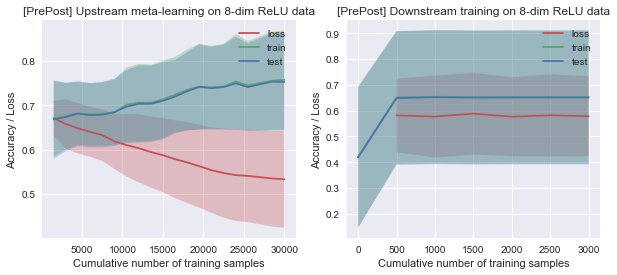

Mean essential stats across all runs:
Last upstream loss: 0.5330
Last upstream train accuracy: 0.7569
Last upstream test accuracy: 0.7523
Last downstream loss: 0.5782
Last downstream train accuracy: 0.6533
Last downstream test accuracy: 0.6507

Saving figure to: figs/comparing_prepostcount_curves


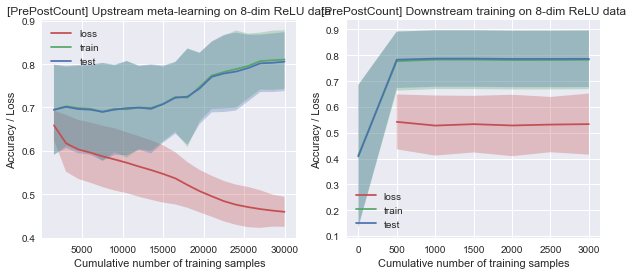

Mean essential stats across all runs:
Last upstream loss: 0.4593
Last upstream train accuracy: 0.8107
Last upstream test accuracy: 0.8058
Last downstream loss: 0.5335
Last downstream train accuracy: 0.7826
Last downstream test accuracy: 0.7862

Saving figure to: figs/comparing_prepostpercent_curves


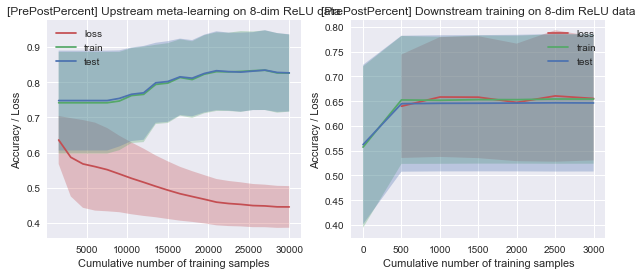

Mean essential stats across all runs:
Last upstream loss: 0.4457
Last upstream train accuracy: 0.8257
Last upstream test accuracy: 0.8263
Last downstream loss: 0.6552
Last downstream train accuracy: 0.6541
Last downstream test accuracy: 0.6462

Saving figure to: figs/comparing_postcount_curves


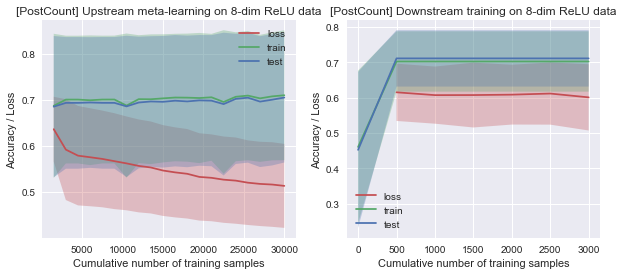

Mean essential stats across all runs:
Last upstream loss: 0.5131
Last upstream train accuracy: 0.7098
Last upstream test accuracy: 0.7048
Last downstream loss: 0.6010
Last downstream train accuracy: 0.7025
Last downstream test accuracy: 0.7113



In [9]:
# Plot aggregated stats.
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on 8-dim ReLU data',
            '[PrePost] Downstream training on 8-dim ReLU data',
            'figs/comparing_prepost_curves')
agg_stats_prepostcount_up = convert_multi_stats_uncertainty(stats_prepostcount_up)
agg_stats_prepostcount_down = convert_multi_stats_uncertainty(stats_prepostcount_down)
plot_curves(agg_stats_prepostcount_up, agg_stats_prepostcount_down,
            '[PrePostCount] Upstream meta-learning on 8-dim ReLU data',
            '[PrePostCount] Downstream training on 8-dim ReLU data',
            'figs/comparing_prepostcount_curves')
agg_stats_prepostpercent_up = convert_multi_stats_uncertainty(stats_prepostpercent_up)
agg_stats_prepostpercent_down = convert_multi_stats_uncertainty(stats_prepostpercent_down)
plot_curves(agg_stats_prepostpercent_up, agg_stats_prepostpercent_down,
            '[PrePostPercent] Upstream meta-learning on 8-dim ReLU data',
            '[PrePostPercent] Downstream training on 8-dim ReLU data',
            'figs/comparing_prepostpercent_curves')
agg_stats_postcount_up = convert_multi_stats_uncertainty(stats_postcount_up)
agg_stats_postcount_down = convert_multi_stats_uncertainty(stats_postcount_down)
plot_curves(agg_stats_postcount_up, agg_stats_postcount_down,
            '[PostCount] Upstream meta-learning on 8-dim ReLU data',
            '[PostCount] Downstream training on 8-dim ReLU data',
            'figs/comparing_postcount_curves')

Saving figure to: figs/default


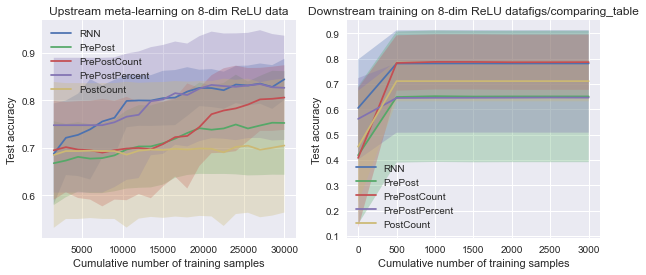

In [10]:
# Plot to compare all.
all_stats_up = [agg_stats_rnn_up, agg_stats_prepost_up, agg_stats_prepostcount_up, agg_stats_prepostpercent_up, agg_stats_postcount_up]
all_stats_down = [agg_stats_rnn_down, agg_stats_prepost_down, agg_stats_prepostcount_down, agg_stats_prepostpercent_down, agg_stats_postcount_down]
labels = ['RNN', 'PrePost', 'PrePostCount', 'PrePostPercent', 'PostCount']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on 8-dim ReLU data',
                    'Downstream training on 8-dim ReLU data'
                    'figs/comparing_table')

Saving figure to: figs/comparing_prepost_test


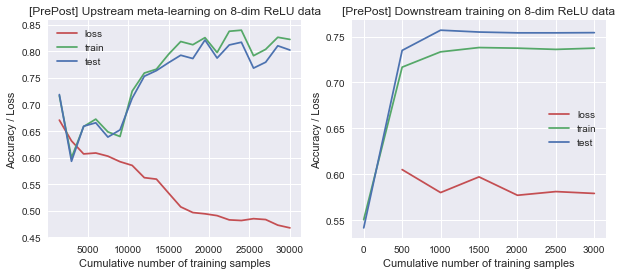

Mean essential stats across all runs:
Last upstream loss: 0.4681
Last upstream train accuracy: 0.8227
Last upstream test accuracy: 0.8027
Last downstream loss: 0.5793
Last downstream train accuracy: 0.7373
Last downstream test accuracy: 0.7542

Saving figure to: figs/comparing_prepost_test


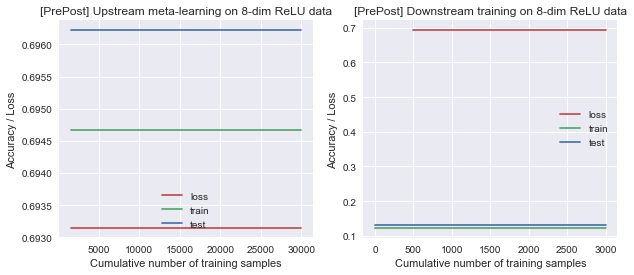

Mean essential stats across all runs:
Last upstream loss: 0.6931
Last upstream train accuracy: 0.6947
Last upstream test accuracy: 0.6962
Last downstream loss: 0.6931
Last downstream train accuracy: 0.1227
Last downstream test accuracy: 0.1311

Saving figure to: figs/comparing_prepost_test


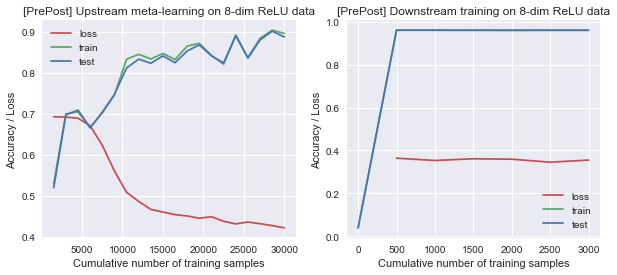

Mean essential stats across all runs:
Last upstream loss: 0.4221
Last upstream train accuracy: 0.8953
Last upstream test accuracy: 0.8869
Last downstream loss: 0.3553
Last downstream train accuracy: 0.9600
Last downstream test accuracy: 0.9600

Saving figure to: figs/comparing_prepost_test


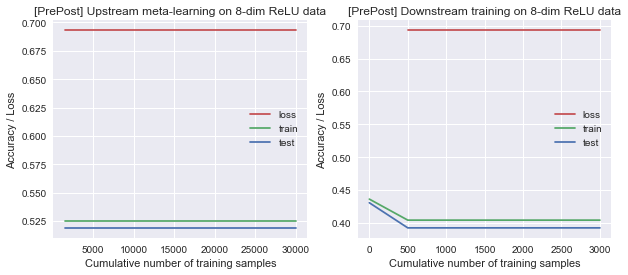

Mean essential stats across all runs:
Last upstream loss: 0.6931
Last upstream train accuracy: 0.5247
Last upstream test accuracy: 0.5189
Last downstream loss: 0.6931
Last downstream train accuracy: 0.4040
Last downstream test accuracy: 0.3922

Saving figure to: figs/comparing_prepost_test


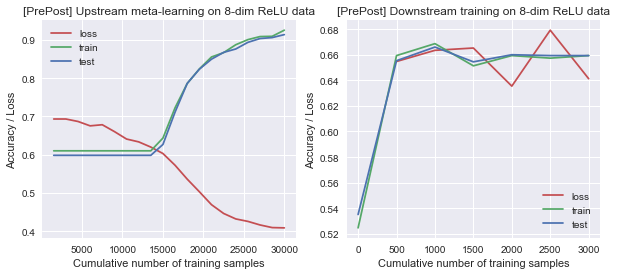

Mean essential stats across all runs:
Last upstream loss: 0.4085
Last upstream train accuracy: 0.9253
Last upstream test accuracy: 0.9138
Last downstream loss: 0.6413
Last downstream train accuracy: 0.6593
Last downstream test accuracy: 0.6593

Saving figure to: figs/comparing_prepost_test


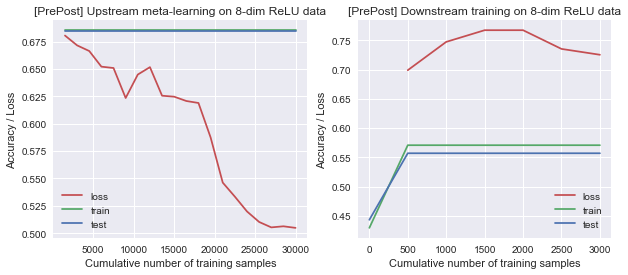

Mean essential stats across all runs:
Last upstream loss: 0.5049
Last upstream train accuracy: 0.6853
Last upstream test accuracy: 0.6847
Last downstream loss: 0.7253
Last downstream train accuracy: 0.5707
Last downstream test accuracy: 0.5569

Saving figure to: figs/comparing_prepost_test


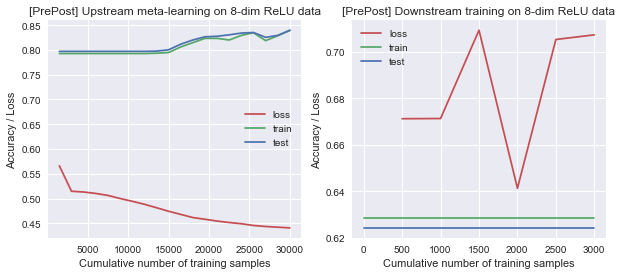

Mean essential stats across all runs:
Last upstream loss: 0.4410
Last upstream train accuracy: 0.8393
Last upstream test accuracy: 0.8398
Last downstream loss: 0.7073
Last downstream train accuracy: 0.6287
Last downstream test accuracy: 0.6242

Saving figure to: figs/comparing_prepost_test


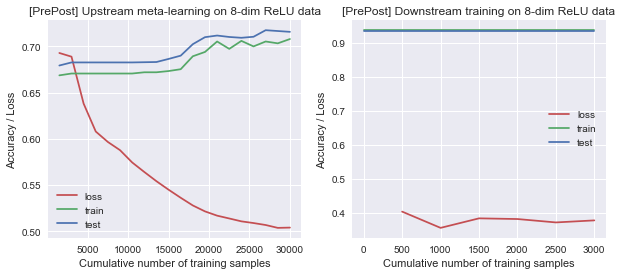

Mean essential stats across all runs:
Last upstream loss: 0.5039
Last upstream train accuracy: 0.7080
Last upstream test accuracy: 0.7158
Last downstream loss: 0.3773
Last downstream train accuracy: 0.9367
Last downstream test accuracy: 0.9342

Saving figure to: figs/comparing_prepost_test


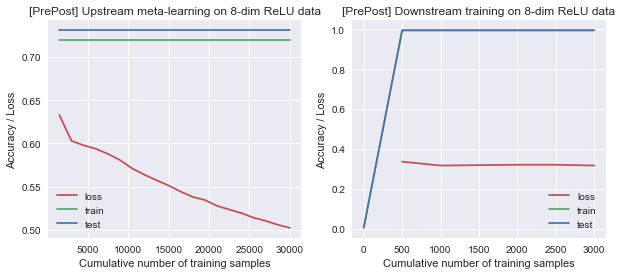

Mean essential stats across all runs:
Last upstream loss: 0.5024
Last upstream train accuracy: 0.7193
Last upstream test accuracy: 0.7309
Last downstream loss: 0.3173
Last downstream train accuracy: 0.9933
Last downstream test accuracy: 0.9947

Saving figure to: figs/comparing_prepost_test


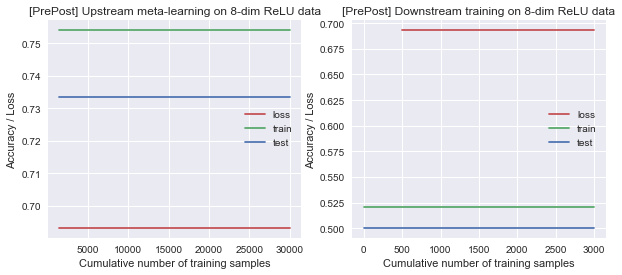

Mean essential stats across all runs:
Last upstream loss: 0.6931
Last upstream train accuracy: 0.7540
Last upstream test accuracy: 0.7336
Last downstream loss: 0.6931
Last downstream train accuracy: 0.5207
Last downstream test accuracy: 0.5004



In [12]:
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
for i in range(len(stats_prepost_up)):
    plot_curves(stats_prepost_up[i], stats_prepost_down[i],
                '[PrePost] Upstream meta-learning on 8-dim ReLU data',
                '[PrePost] Downstream training on 8-dim ReLU data',
                'figs/comparing_prepost_test')

## Evaluate all small-ANN-based feed-forward networks.